In [126]:
import requests
from bs4 import BeautifulSoup
import os
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [101]:
URL="https://www.mohfw.gov.in"

In [102]:
extract_content = lambda row : [x.text.replace('\n', '') for x in row]

In [103]:
SHORT_HEADERS=['SNo', 'State', 'Indai-Confirmed', 'Foreign-Confirmed', 'Cured', 'Death']

response = requests.get(URL).content

In [104]:
soup = BeautifulSoup(response, 'html.parser')
header = extract_content(soup.tr.find_all('th'))

In [112]:
stats = []
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_content(row.find_all('td'))
    if stat:
        if len(stat) == 5:
            # last row
            stat = ['', *stat]
            stats.append(stat)
        elif len(stat) == 6:
            stats.append(stat)


In [114]:


df = pd.DataFrame(stats, columns=['','SrNo',
 'State',
 'No Of Cases',
 'Cured',
 'Death'])

In [117]:
df['No Of Cases'] = df['No Of Cases'].astype('int')
df['Cured'] = df['Cured'].astype('int')
df['Death'] = df['Death'].astype('int')
    

In [133]:
df = df.sort_values(by =['No Of Cases'], ascending=True)

In [134]:
df[['State', 'No Of Cases', 'Cured', 'Death']]

,State,No Of Cases,Cured,Death
2,Arunachal Pradesh,1,0,0
20,Mizoram,1,0,0
19,Manipur,2,0,0
13,Jharkhand,3,0,0
22,Puducherry,5,1,0
11,Himachal Pradesh,6,1,1
8,Goa,7,0,0
6,Chhattisgarh,9,3,0
1,Andaman and Nicobar Islands,10,0,0
16,Ladakh,14,10,0


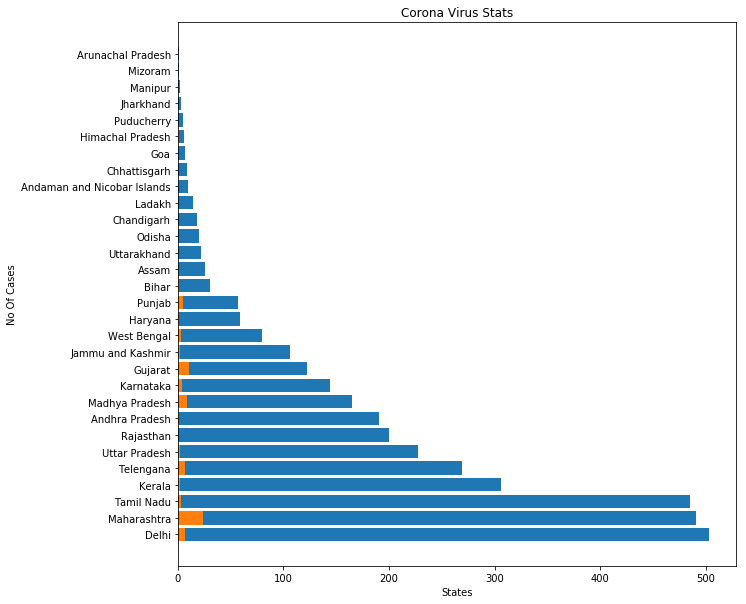

In [132]:
plt.figure(figsize=(10,10))
plt.barh(df['State'], df['No Of Cases'],)
plt.barh(df['State'], df['Death'])
plt.title("Corona Virus Stats")
plt.xlabel('States')
plt.ylabel('No Of Cases')
plt.show()

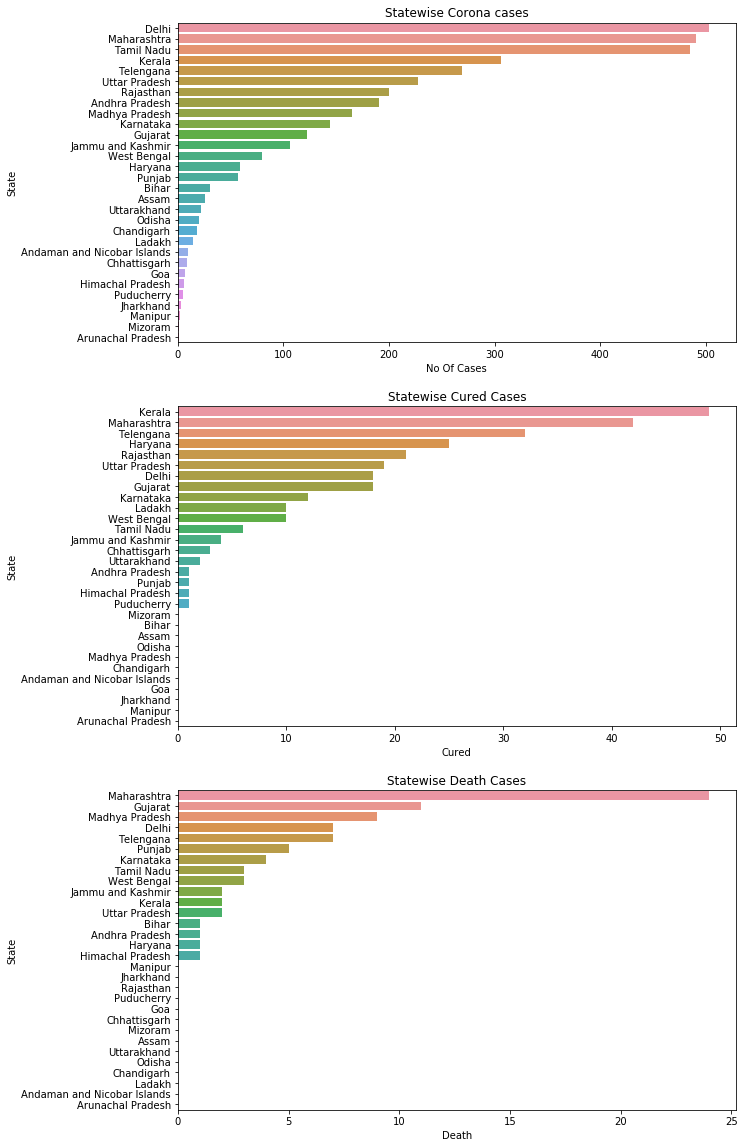

In [122]:
#plt.figure(figsize=(10,80))
plt.subplots(nrows=3, ncols=1, figsize=(10,20))
plt.subplot(3,1,1)
sns.barplot(y='State',
            x = 'No Of Cases',
            data=df.sort_values(by =['No Of Cases'], ascending=False))
plt.title('Statewise Corona cases')

plt.subplot(3,1,2)
sns.barplot(y='State',
            x = 'Cured',
            data=df.sort_values(by =['Cured'], ascending=False))
plt.title('Statewise Cured Cases')

plt.subplot(3,1,3)
sns.barplot(y='State',
            x = 'Death',
            data=df.sort_values(by =['Death'], ascending=False))
plt.title('Statewise Death Cases')
plt.show()

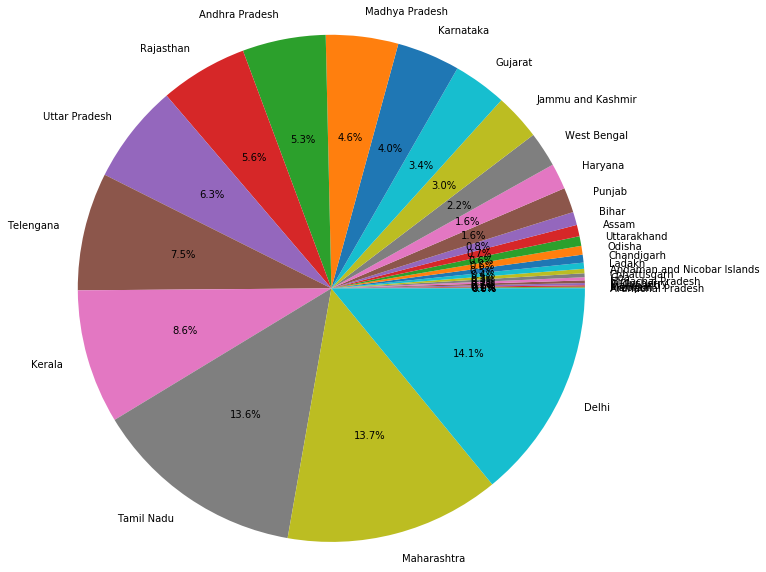

In [124]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(df['No Of Cases'], labels=df['State'], autopct='%1.1f%%')
ax1.axis('equal')
plt.show()